In [2]:
import pandas as pd

df_mediodia = pd.read_csv('datos_sensor_mediodia.csv')
df_noche_luz = pd.read_csv('datos_sensor_nocheLuz.csv')
df_noche_sin_luz = pd.read_csv('datos_sensor_nocheSinLuz.csv')

In [3]:
df_mediodia.describe()

,LDR,MQ2,Humedad,Temperatura
count,90.000000,90.000000,90.000000,90.000000
mean,226.888889,214.655556,39.755556,29.891111
std,16.960923,2.544706,0.432165,0.028618
min,222.000000,211.000000,39.000000,29.800000
25%,223.250000,212.000000,40.000000,29.900000
50%,225.000000,215.000000,40.000000,29.900000
75%,226.750000,217.000000,40.000000,29.900000
max,385.000000,218.000000,40.000000,29.900000


In [4]:
df_noche_luz.describe()

,LDR,MQ2,Humedad,Temperatura
count,28.000000,28.000000,28.000000,28.000000
mean,284.750000,291.357143,42.071429,28.864286
std,21.582958,4.739232,0.262265,0.062148
min,275.000000,284.000000,42.000000,28.800000
25%,277.750000,287.750000,42.000000,28.800000
50%,281.000000,291.500000,42.000000,28.900000
75%,283.250000,295.250000,42.000000,28.900000
max,393.000000,299.000000,43.000000,29.000000


In [5]:
df_noche_sin_luz.describe()

,LDR,MQ2,Humedad,Temperatura
count,38.000000,38.000000,38.0,38.000000
mean,266.500000,266.421053,42.0,29.026316
std,20.849201,1.967734,0.0,0.044626
min,261.000000,263.000000,42.0,29.000000
25%,262.000000,265.000000,42.0,29.000000
50%,263.000000,266.000000,42.0,29.000000
75%,264.000000,268.000000,42.0,29.075000
max,391.000000,270.000000,42.0,29.100000


Gráficos del cada dataset

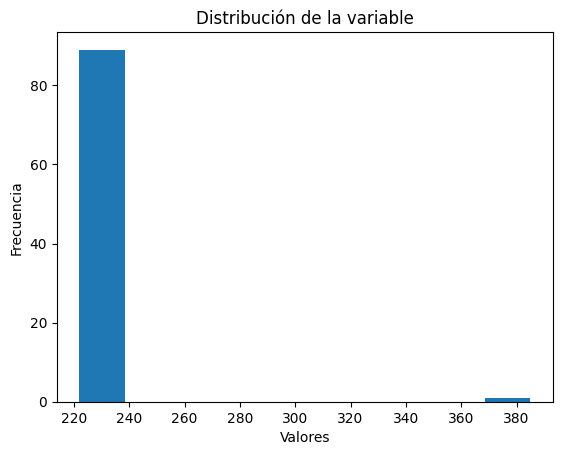

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de una variable
plt.hist(df_mediodia['LDR'])
plt.title('Distribución de la variable')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()




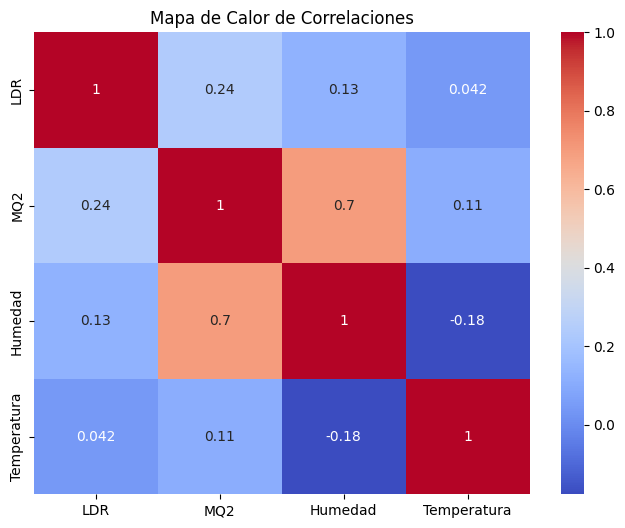

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_mediodia.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


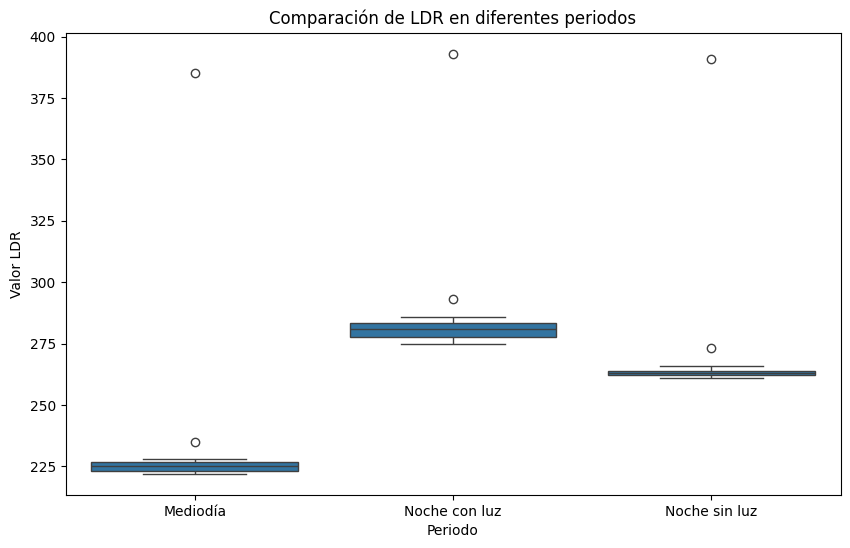

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tres DataFrames:
# df_mediodia, df_noche_luz, df_noche_sin_luz

# Agrega una columna para identificar el periodo en cada DataFrame
df_mediodia['Periodo'] = 'Mediodía'
df_noche_luz['Periodo'] = 'Noche con luz'
df_noche_sin_luz['Periodo'] = 'Noche sin luz'

# Concatena los tres DataFrames en uno solo
df_total = pd.concat([df_mediodia, df_noche_luz, df_noche_sin_luz], ignore_index=True)

# Grafica la distribución de la variable LDR en cada periodo utilizando un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Periodo', y='LDR', data=df_total)
plt.title('Comparación de LDR en diferentes periodos')
plt.xlabel('Periodo')
plt.ylabel('Valor LDR')
plt.show()


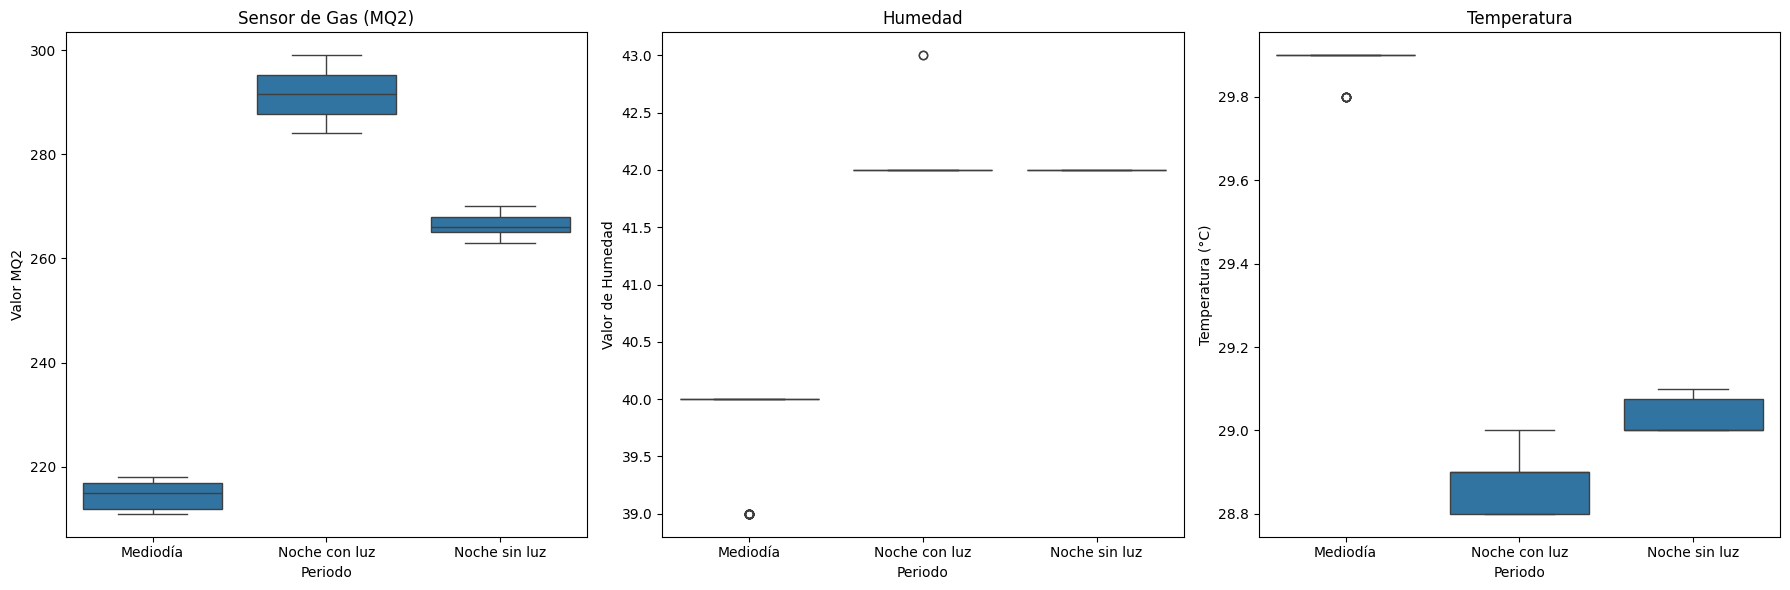

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes tres DataFrames:
# df_mediodia, df_noche_luz, df_noche_sin_luz

# Agrega una columna para identificar el periodo en cada DataFrame
df_mediodia['Periodo'] = 'Mediodía'
df_noche_luz['Periodo'] = 'Noche con luz'
df_noche_sin_luz['Periodo'] = 'Noche sin luz'

# Concatena los tres DataFrames en uno solo
df_total = pd.concat([df_mediodia, df_noche_luz, df_noche_sin_luz], ignore_index=True)

# Configurar una figura con 3 subplots, uno para cada variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico para el sensor de gas (MQ2)
sns.boxplot(x='Periodo', y='MQ2', data=df_total, ax=axes[0])
axes[0].set_title('Sensor de Gas (MQ2)')
axes[0].set_xlabel('Periodo')
axes[0].set_ylabel('Valor MQ2')

# Gráfico para la humedad
sns.boxplot(x='Periodo', y='Humedad', data=df_total, ax=axes[1])
axes[1].set_title('Humedad')
axes[1].set_xlabel('Periodo')
axes[1].set_ylabel('Valor de Humedad')

# Gráfico para la temperatura
sns.boxplot(x='Periodo', y='Temperatura', data=df_total, ax=axes[2])
axes[2].set_title('Temperatura')
axes[2].set_xlabel('Periodo')
axes[2].set_ylabel('Temperatura (°C)')
plt.show()


Construcción del Modelo

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Supongamos que ya tienes df_total con las columnas: 'LDR', 'MQ2', 'Humedad', 'Temperatura' y 'Periodo'
# Por ejemplo:
#   LDR   MQ2  Humedad  Temperatura         Periodo
#  512   300      55          24        Mediodía
#  ...

# Selecciona las características (features) y la variable objetivo (target)
features = ['LDR', 'MQ2', 'Humedad', 'Temperatura']
X = df_total[features]
y = df_total['Periodo']

# Divide los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos para mejorar el desempeño del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrena un modelo de clasificación, por ejemplo un RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test_scaled)

# Evalúa el modelo con un reporte de clasificación y una matriz de confusión
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

     Mediodía       1.00      1.00      1.00        17
Noche con luz       1.00      1.00      1.00         9
Noche sin luz       1.00      1.00      1.00         6

     accuracy                           1.00        32
    macro avg       1.00      1.00      1.00        32
 weighted avg       1.00      1.00      1.00        32

Matriz de confusión:
[[17  0  0]
 [ 0  9  0]
 [ 0  0  6]]


Prueba del Modelo

In [19]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Supongamos que df_total ya contiene las columnas: 'LDR', 'MQ2', 'Humedad', 'Temperatura' y 'Periodo'
features = ['LDR', 'MQ2', 'Humedad', 'Temperatura']
X = df_total[features]
y = df_total['Periodo']

# Estandarizamos las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definimos el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Configuramos una validación cruzada estratificada con 5 particiones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculamos las puntuaciones (accuracy) en cada partición
scores = cross_val_score(clf, X_scaled, y, cv=cv, scoring='accuracy')

print("Puntuaciones de validación cruzada:", scores)
print("Exactitud media:", scores.mean())


Puntuaciones de validación cruzada: [1. 1. 1. 1. 1.]
Exactitud media: 1.0
